<a href="https://colab.research.google.com/github/Meralytics/Machine-Learning/blob/main/Microsoft_Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Part1: supervised learning`

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

### Read the dataset with sampling



In [ ]:
# Read data from the CSV file
Mic_data = pd.read_csv('/content/Microsoft_malware_dataset.csv')

<ipython-input-5-f9f19b20ab16>:2: DtypeWarning: Columns (28,41) have mixed types. Specify dtype option on import or set low_memory=False.
  Mic_data = pd.read_csv('/content/Microsoft_malware_dataset.csv')


In [ ]:
Mic_data.shape

(1000000, 83)

In [ ]:
Mic_data.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,1000000.000000,996334.000000,1000000.000000,48303.000000,995907.000000,995907.000000,995907.000000,1000000.000000,1000000.000000,963487.000000,...,982112.000000,1000000.000000,366287.0,998212.000000,1000000.000000,1000000.000000,992020.000000,965907.000000,965907.000000,1000000.000000
mean,0.000007,6.845415,0.017332,1661.845496,47853.202533,1.326662,1.021031,0.987898,108.030204,81315.291894,...,33027.203952,0.486921,0.0,0.006934,0.125353,0.037944,0.057148,0.283539,7.884680,0.499813
std,0.002646,1.024770,0.130505,1001.268214,14013.898971,0.522951,0.167839,0.109341,63.018707,48949.025166,...,21197.125197,0.499829,0.0,0.082984,0.331119,0.191061,0.232125,0.450716,4.550612,0.500000
min,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000,0.000000,0.000000,1.000000,5.000000,...,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,7.000000,0.000000,788.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36825.000000,...,13156.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.000000,7.000000,0.000000,1632.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,...,33070.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
75%,0.000000,7.000000,0.000000,2388.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,123984.000000,...,52427.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,1.000000,8.000000,1.000000,3204.000000,70492.000000,5.000000,5.000000,1.000000,222.000000,167962.000000,...,72091.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


### Pandas profiling reports

In [ ]:
#!pip install pandas-profiling

In [ ]:
#from pandas_profiling import ProfileReport

#profile = ProfileReport(dfec)
#profile.to_file("output_report.html")
#profile.to_notebook_iframe()

# Data investigation and preprocessing

In [ ]:
Mic_data.shape

(1000000, 83)

In [ ]:
for col in Mic_data.columns:
    unique_values = Mic_data[col].nunique()
    missing_percentage = Mic_data[col].isnull().sum() * 100 / Mic_data.shape[0]
    data_type = Mic_data[col].dtype

    print(f"Feature: {col}")
    print(f"  Unique values: {unique_values}")
    print(f"  Percentage of missing values: {missing_percentage:.2f}%")
    print(f"  Type: {data_type}")
    print("\n")

Feature: MachineIdentifier
  Unique values: 1000000
  Percentage of missing values: 0.00%
  Type: object


Feature: ProductName
  Unique values: 6
  Percentage of missing values: 0.00%
  Type: object


Feature: EngineVersion
  Unique values: 60
  Percentage of missing values: 0.00%
  Type: object


Feature: AppVersion
  Unique values: 95
  Percentage of missing values: 0.00%
  Type: object


Feature: AvSigVersion
  Unique values: 7353
  Percentage of missing values: 0.00%
  Type: object


Feature: IsBeta
  Unique values: 2
  Percentage of missing values: 0.00%
  Type: int64


Feature: RtpStateBitfield
  Unique values: 6
  Percentage of missing values: 0.37%
  Type: float64


Feature: IsSxsPassiveMode
  Unique values: 2
  Percentage of missing values: 0.00%
  Type: int64


Feature: DefaultBrowsersIdentifier
  Unique values: 784
  Percentage of missing values: 95.17%
  Type: float64


Feature: AVProductStatesIdentifier
  Unique values: 8192
  Percentage of missing values: 0.41%
  Type: f

In [ ]:
Mic_data.duplicated().sum()

0

In [ ]:
# Identify columns with more than 99% missing values
columns_to_drop = []
for col in Mic_data.columns:
    missing_percentage = Mic_data[col].isnull().sum() * 100 / Mic_data.shape[0]
    if missing_percentage > 70:
        columns_to_drop.append(col)

# Drop the identified columns
Mic_data.drop(columns=columns_to_drop, inplace=True)

# Print the columns that were dropped
print(f"Dropped columns: {columns_to_drop}")


Dropped columns: ['DefaultBrowsersIdentifier', 'PuaMode', 'Census_ProcessorClass', 'Census_InternalBatteryType', 'Census_IsFlightingInternal']


column contains the same value for all rows and does not provide any meaningful information for our analysis, it can be considered irrelevant and is a good candidate for removal.

In [ ]:
# Find and drop columns with constant values
constant_columns = [col for col in Mic_data.columns if Mic_data[col].nunique() == 1]

# Print or display the names of the removed columns
print("Removed constant columns:")
for col in constant_columns:
    print(col)

# Drop the constant columns from the DataFrame
Mic_data.drop(columns=constant_columns, inplace=True)

Removed constant columns:
Census_IsWIMBootEnabled


In [ ]:
# Count the number of rows with at least one missing value
rows_with_missing_values = Mic_data.isna().any(axis=1).sum()

# Print the result
print(f"Number of rows with missing values: {rows_with_missing_values}")

Number of rows with missing values: 795030


In [ ]:
# Remove rows with any null values
Mic_data.dropna(inplace=True)

# Check the shape of the DataFrame after dropping rows
print("Shape of DataFrame after dropping rows with null values:", Mic_data.shape)

Shape of DataFrame after dropping rows with null values: (204970, 77)


In [ ]:
Mic_data.isnull().sum()

MachineIdentifier                          0
ProductName                                0
EngineVersion                              0
AppVersion                                 0
AvSigVersion                               0
                                          ..
Census_IsPenCapable                        0
Census_IsAlwaysOnAlwaysConnectedCapable    0
Wdft_IsGamer                               0
Wdft_RegionIdentifier                      0
HasDetections                              0
Length: 77, dtype: int64

 **`Visualization`**

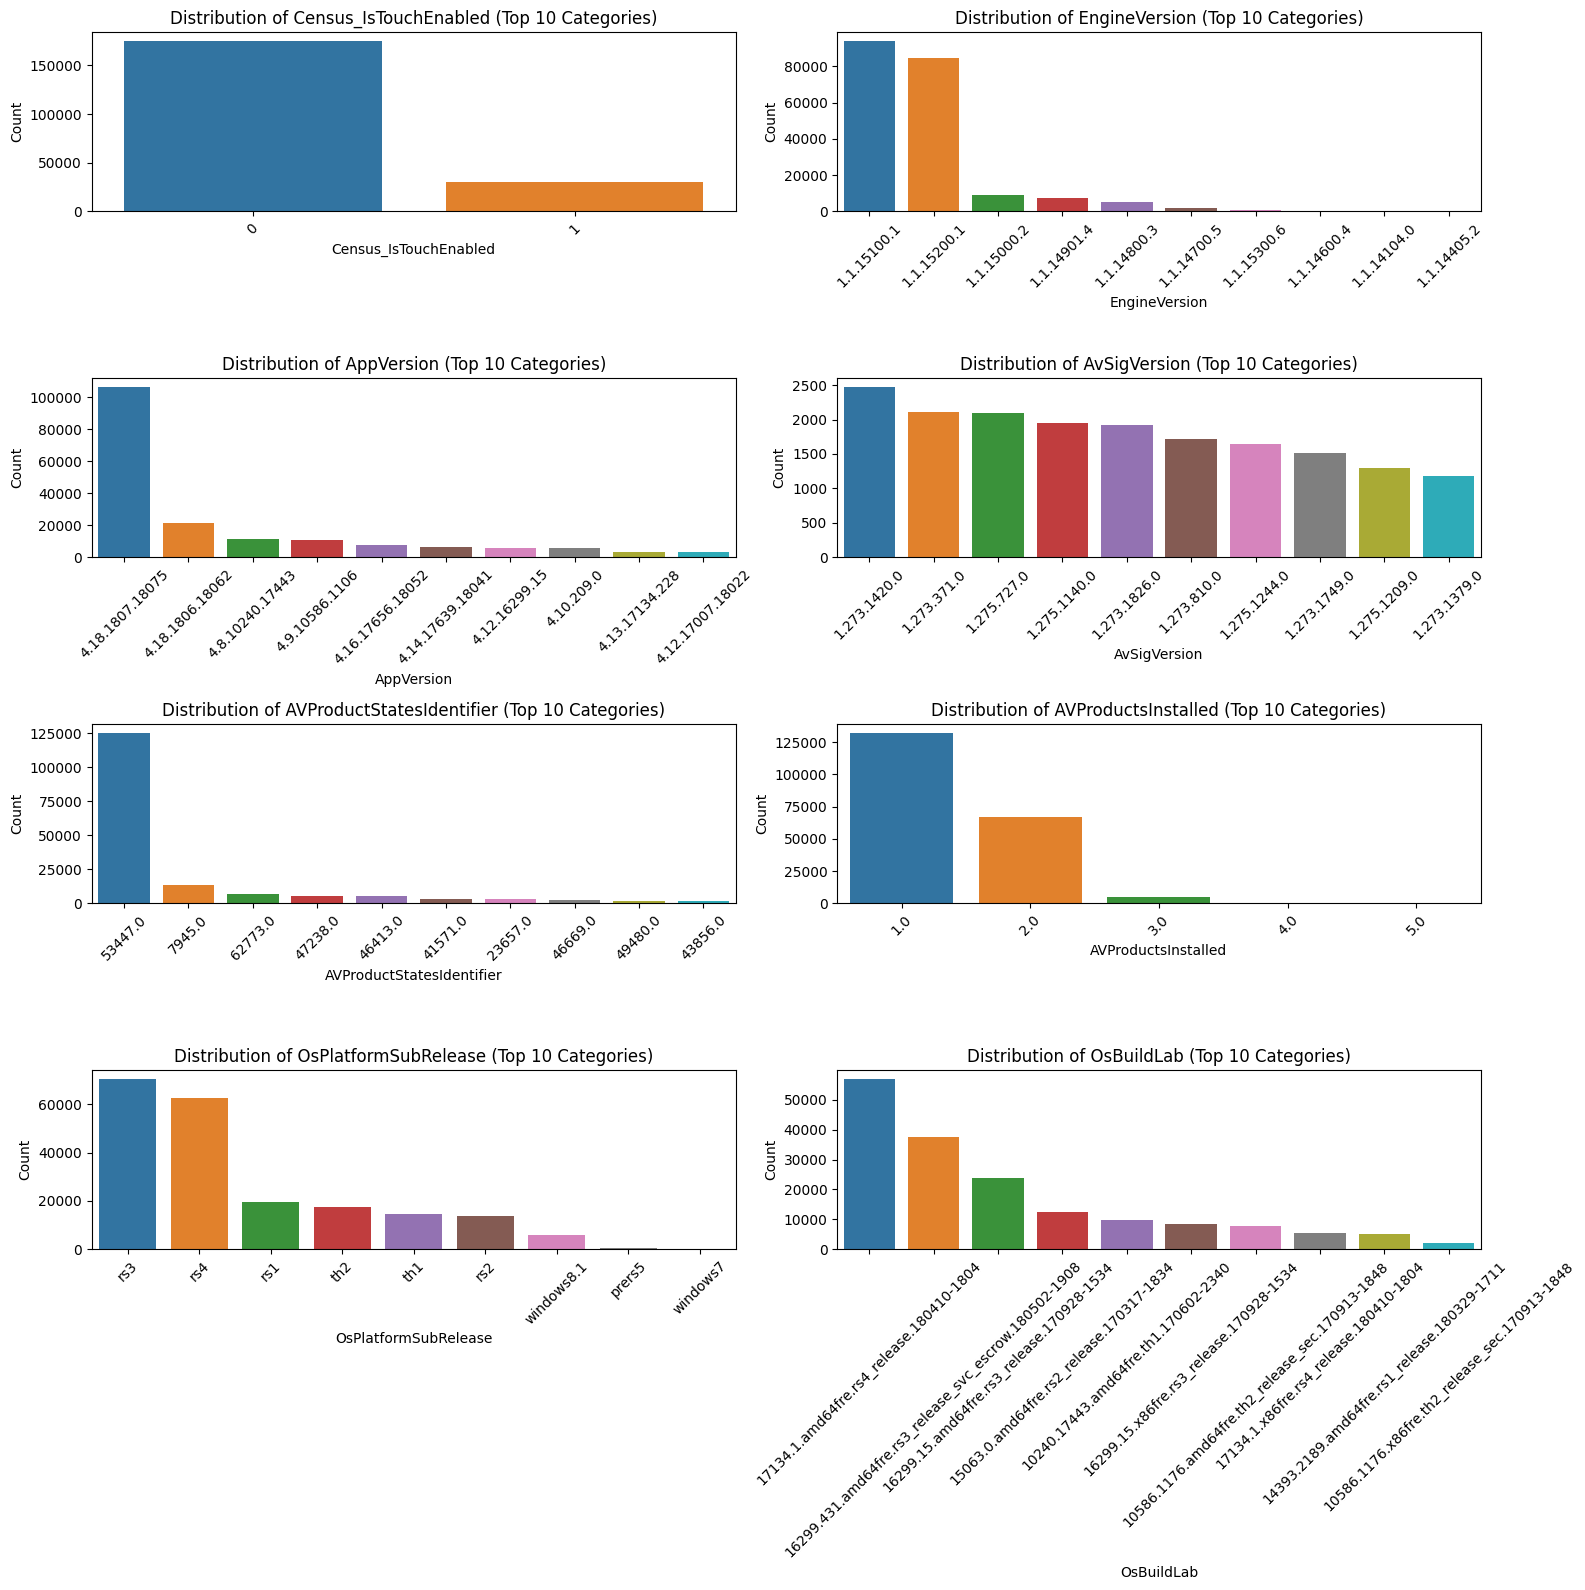

In [ ]:



# Create a function to plot categorical features
def plot_categorical_feature(col, top_n=10):
    top_categories = Mic_data[col].value_counts().head(top_n)
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, order=top_categories.index)
    plt.title(f'Distribution of {col} (Top {top_n} Categories)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# Define a list of categorical columns to plot
categorical_columns = [
    'Census_IsTouchEnabled',
    'EngineVersion',
    'AppVersion',
    'AvSigVersion',
    'AVProductStatesIdentifier',
    'AVProductsInstalled',
    'OsPlatformSubRelease',
    'OsBuildLab'
]

# Create subplots for the categorical features
num_rows = len(categorical_columns) // 2 + len(categorical_columns) % 2
fig, axes = plt.subplots(num_rows, 2, figsize=(16, 4 * num_rows))
for i, col in enumerate(categorical_columns):
    row = i // 2
    col_idx = i % 2
    ax = axes[row, col_idx]
    top_categories = Mic_data[col].value_counts().head(10)  # Adjust the top_n as needed
    sns.countplot(data=Mic_data, x=col, order=top_categories.index, ax=ax)
    ax.set_title(f'Distribution of {col} (Top 10 Categories)')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

### Handle outliers

<ipython-input-19-3b9eeb513066>:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 4))


Percentage of outliers in IsBeta: 0.00%
Percentage of outliers in RtpStateBitfield: 2.50%
Percentage of outliers in IsSxsPassiveMode: 0.00%
Percentage of outliers in AVProductStatesIdentifier: 17.55%
Percentage of outliers in AVProductsInstalled: 24.15%
Percentage of outliers in AVProductsEnabled: 0.12%
Percentage of outliers in HasTpm: 0.12%
Percentage of outliers in CountryIdentifier: 0.00%
Percentage of outliers in CityIdentifier: 0.00%
Percentage of outliers in OrganizationIdentifier: 1.81%
Percentage of outliers in GeoNameIdentifier: 0.00%
Percentage of outliers in LocaleEnglishNameIdentifier: 0.00%
Percentage of outliers in OsBuild: 10.71%
Percentage of outliers in OsSuite: 0.00%
Percentage of outliers in IsProtected: 0.00%
Percentage of outliers in AutoSampleOptIn: 0.00%
Percentage of outliers in SMode: 0.00%
Percentage of outliers in IeVerIdentifier: 0.09%
Percentage of outliers in Firewall: 1.63%
Percentage of outliers in UacLuaenable: 0.24%
Percentage of outliers in Census_OE

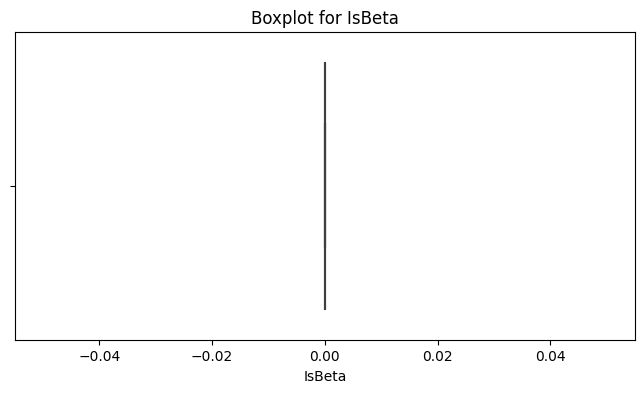

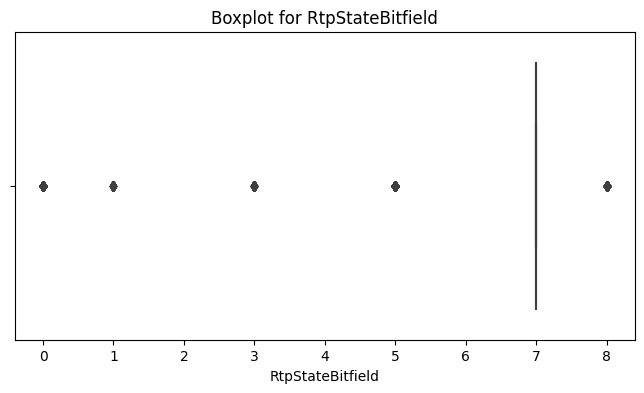

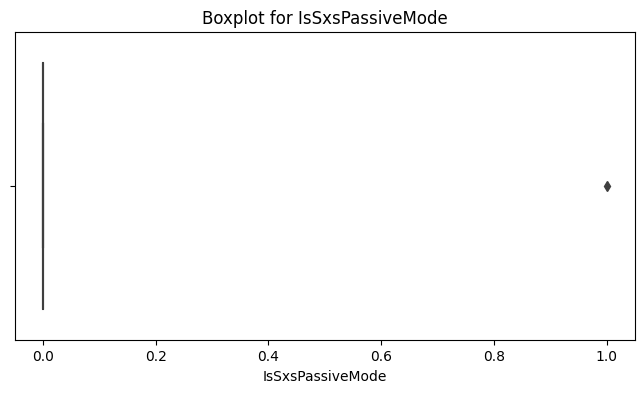

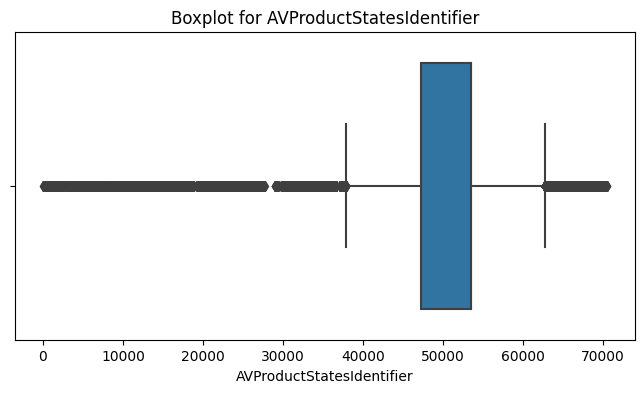

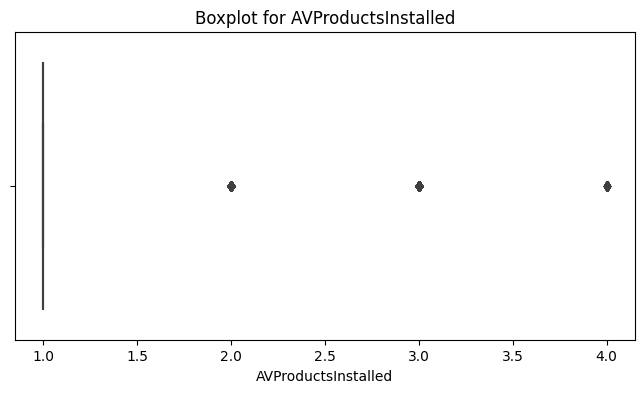

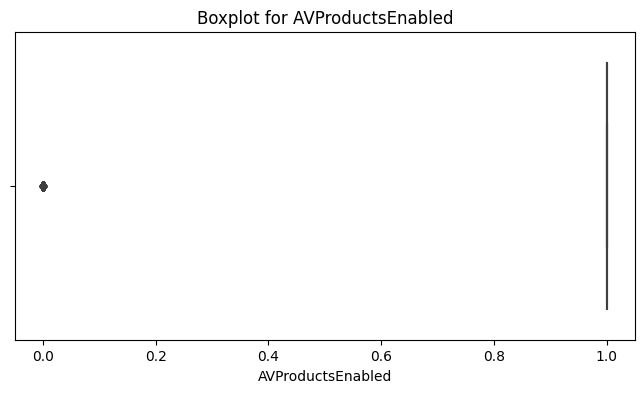

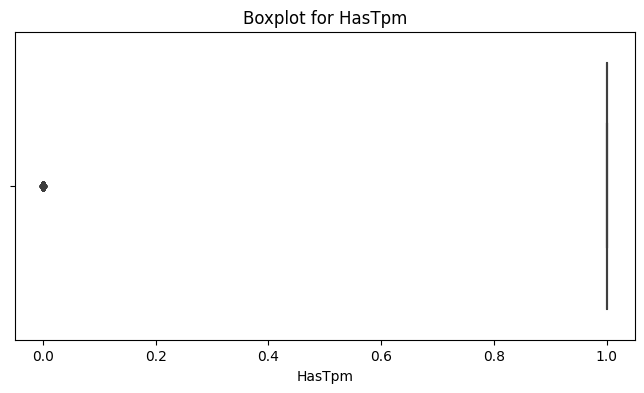

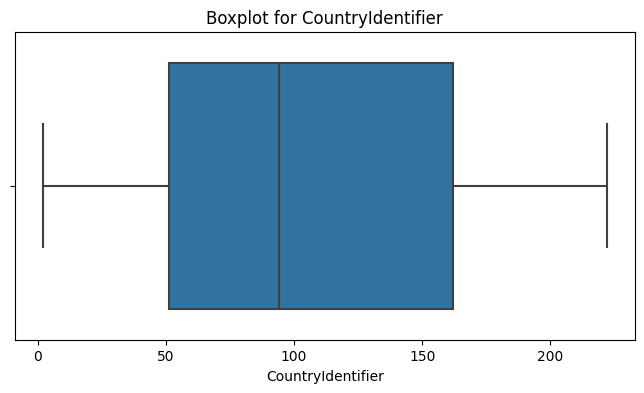

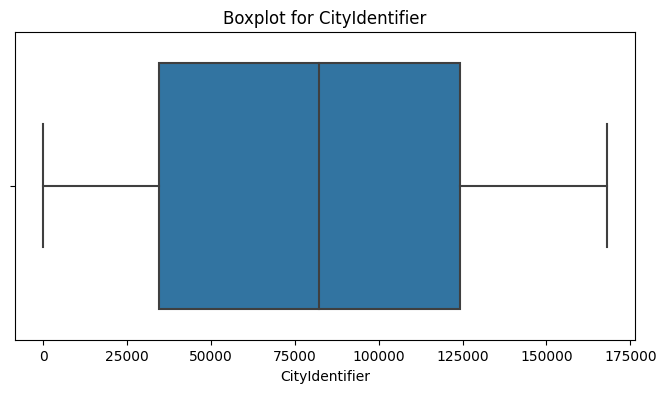

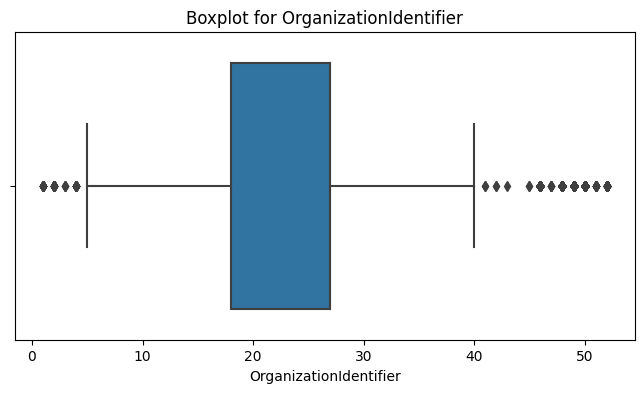

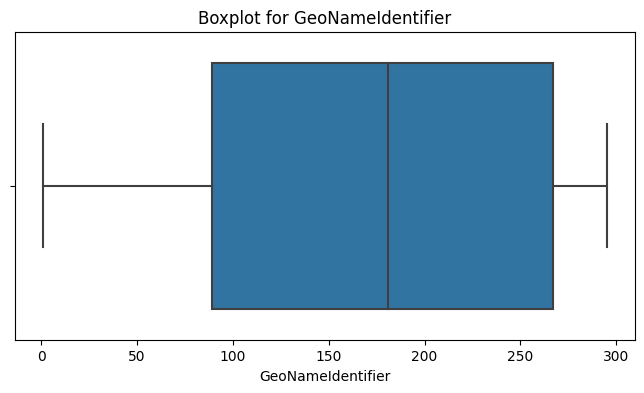

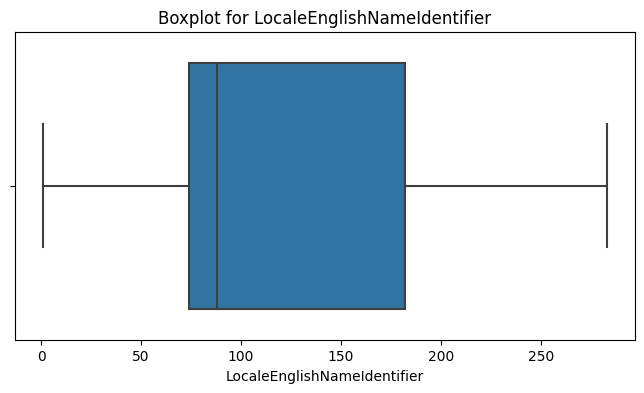

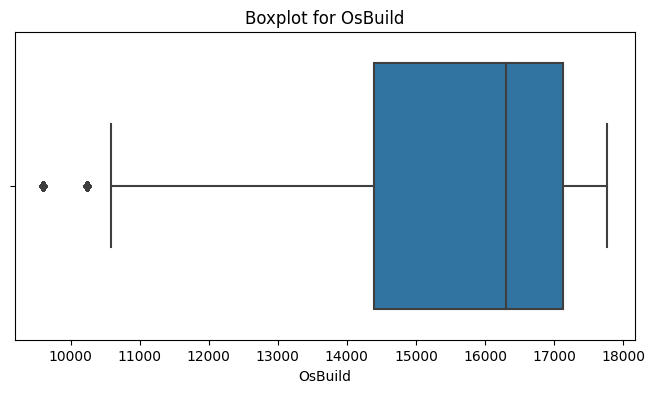

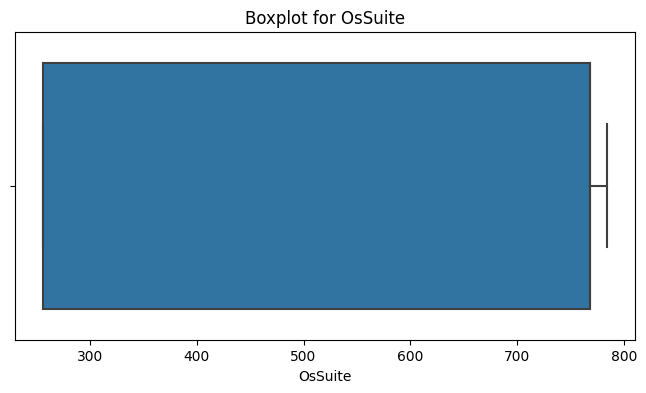

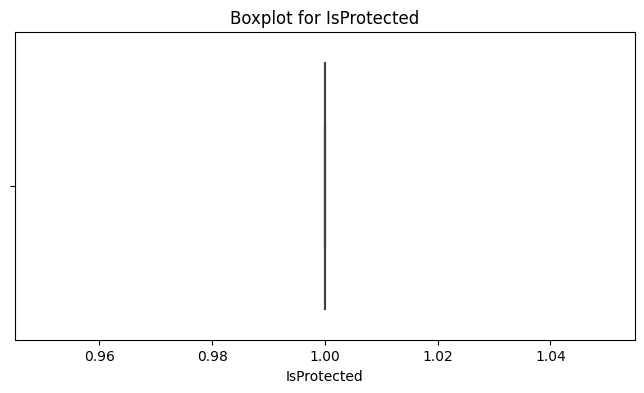

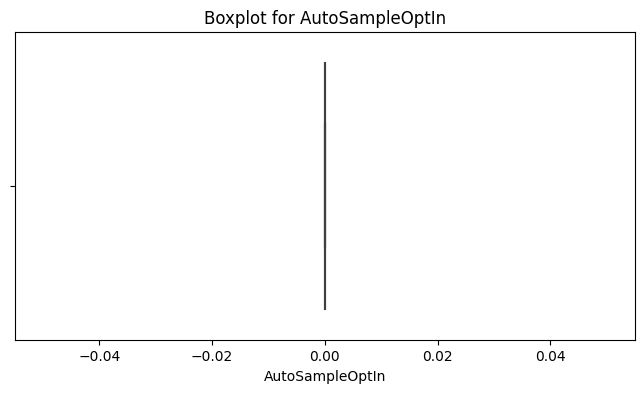

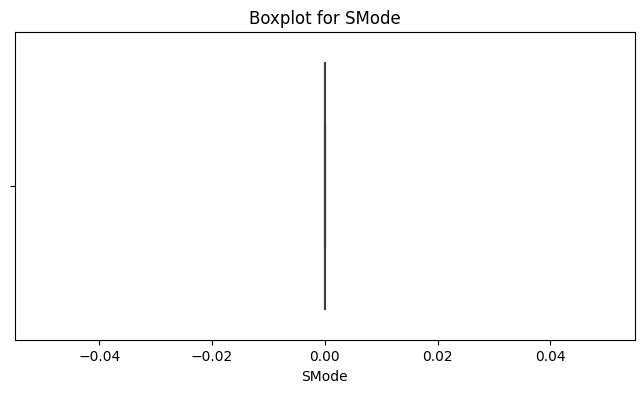

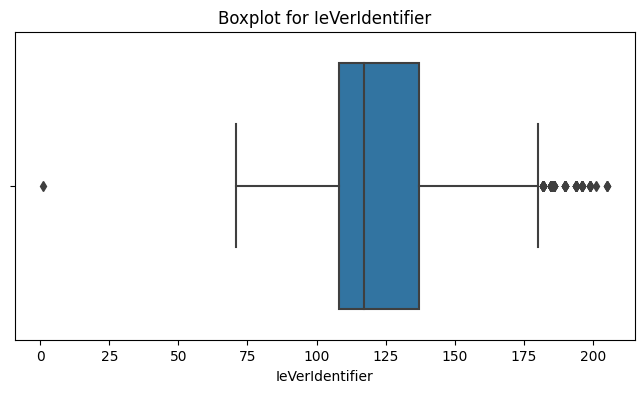

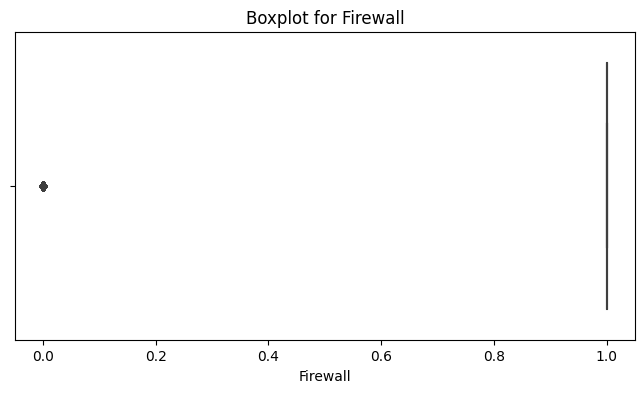

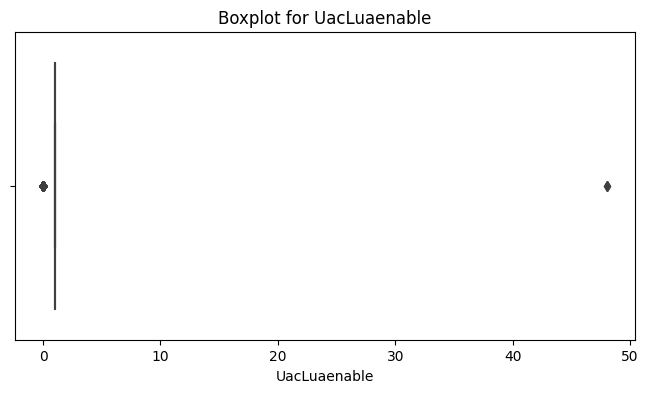

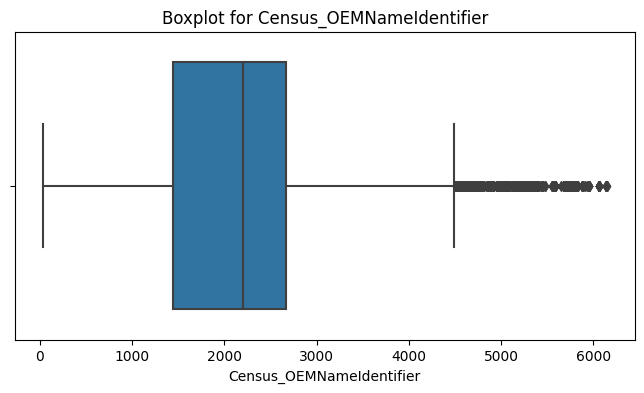

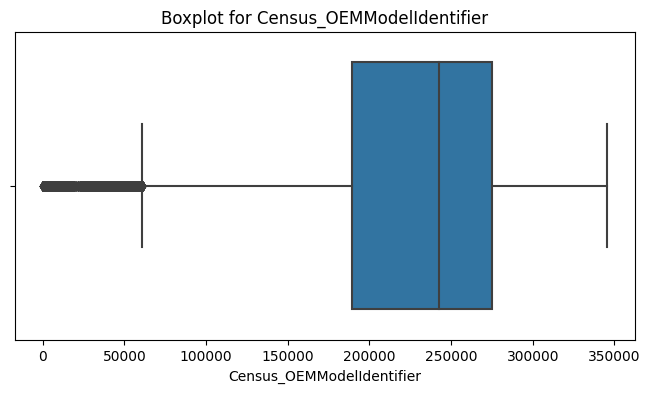

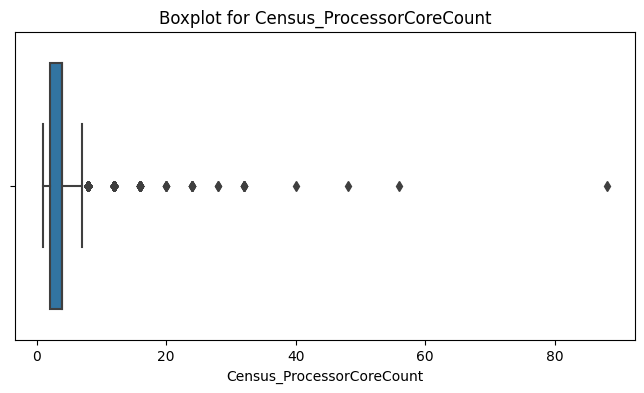

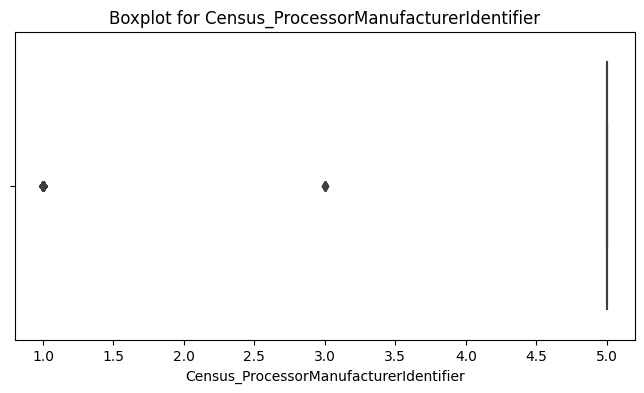

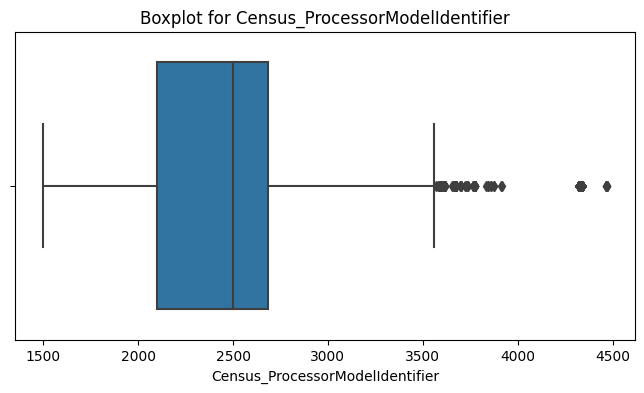

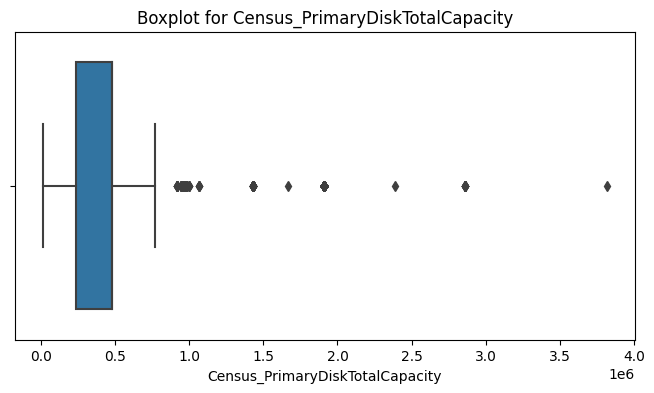

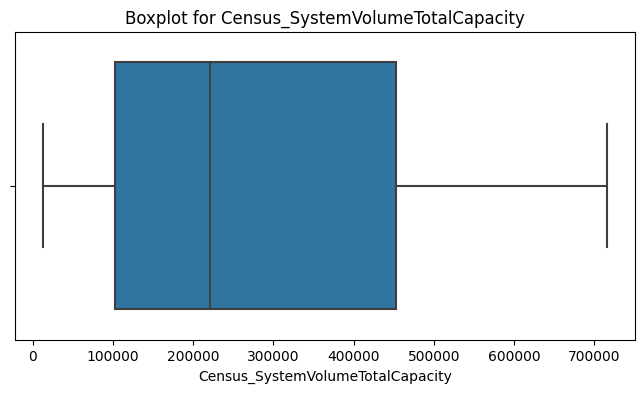

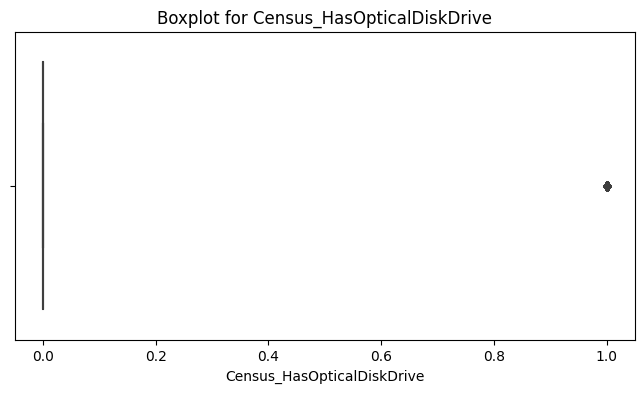

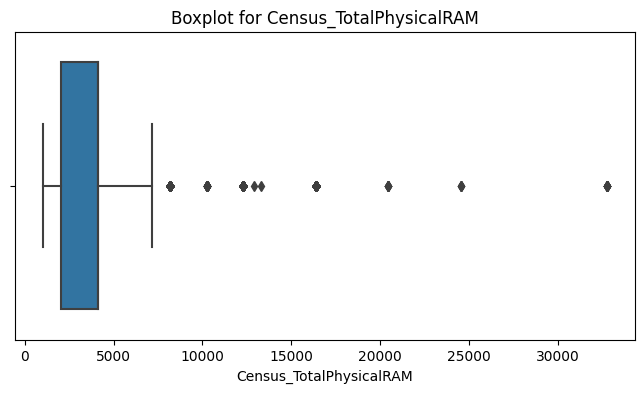

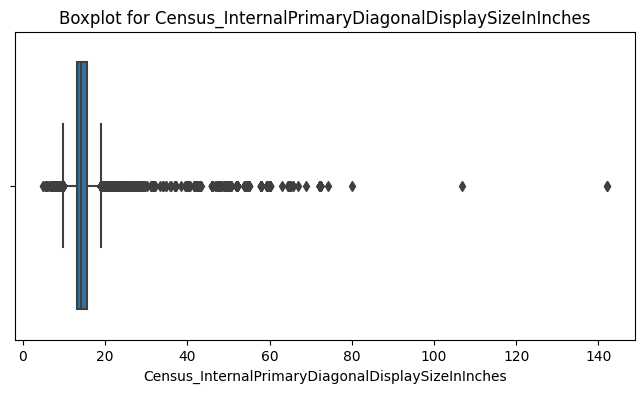

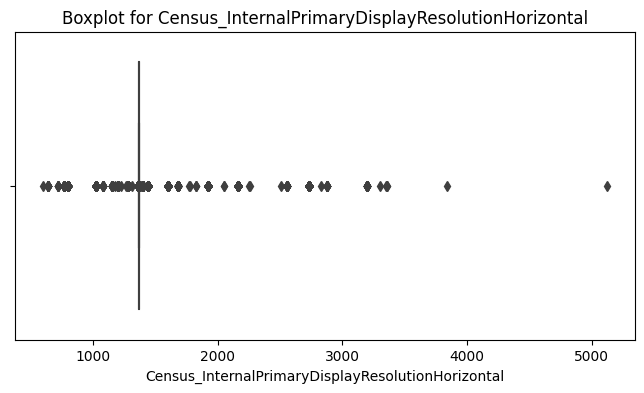

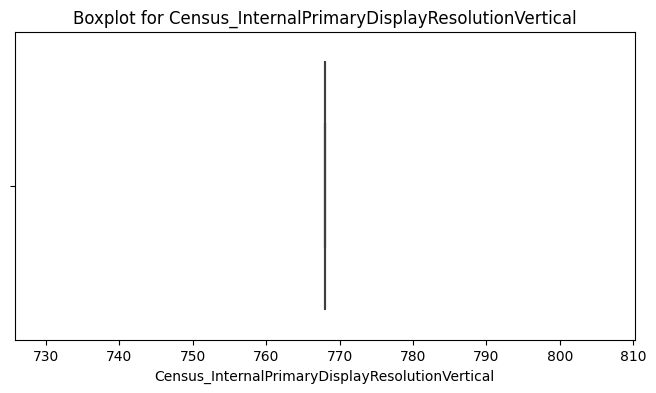

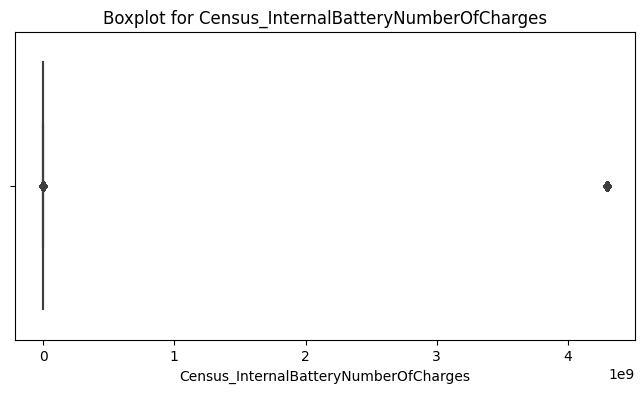

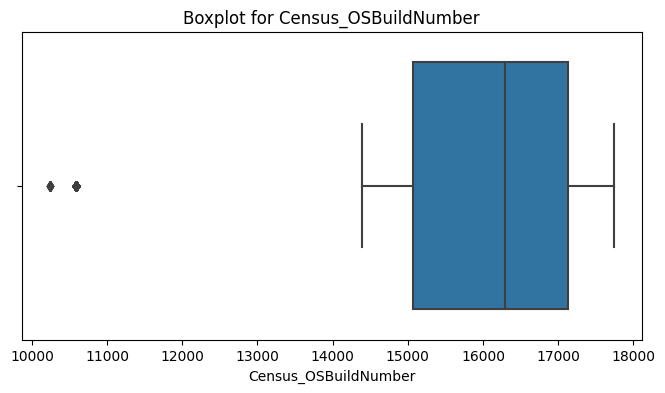

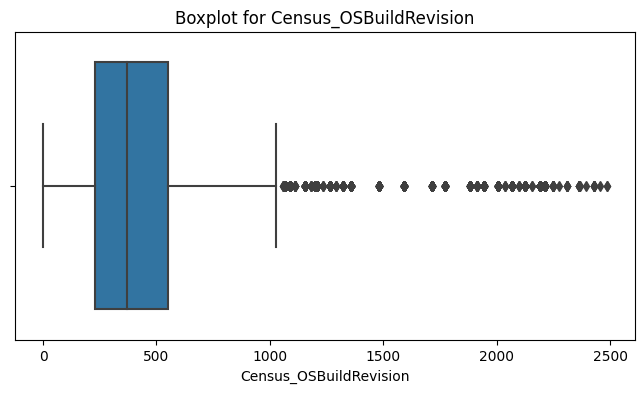

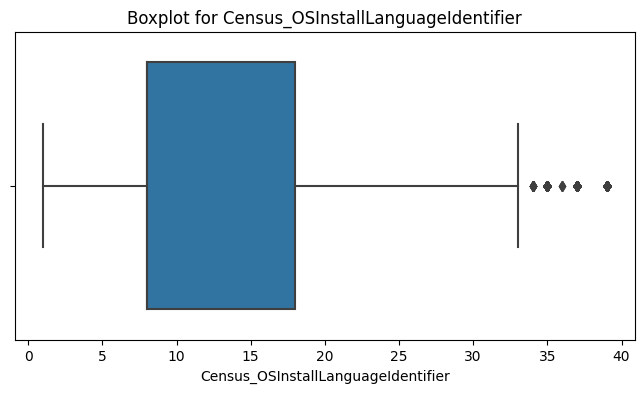

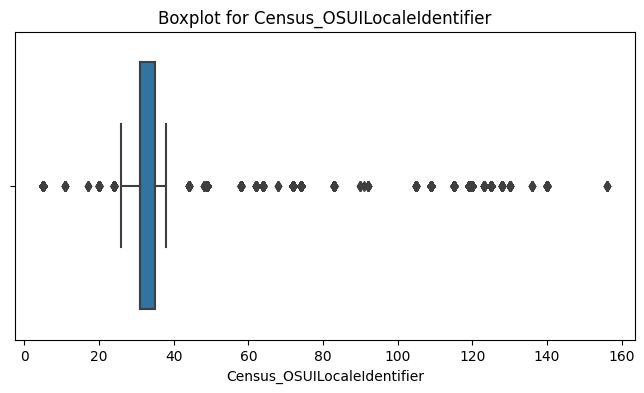

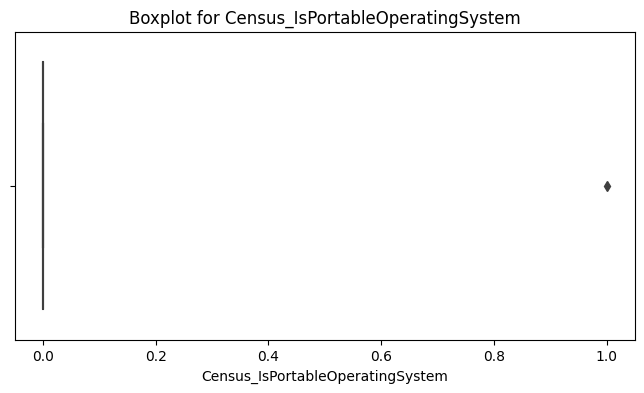

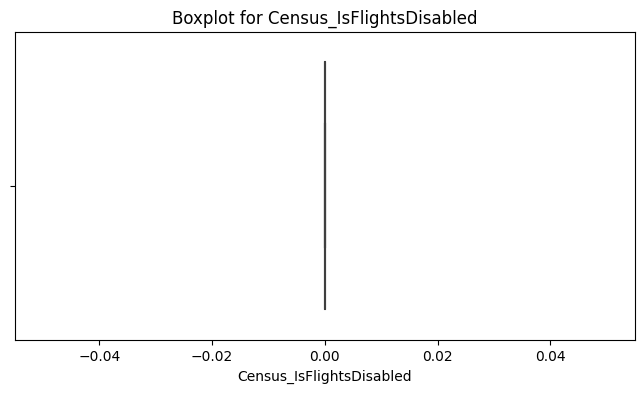

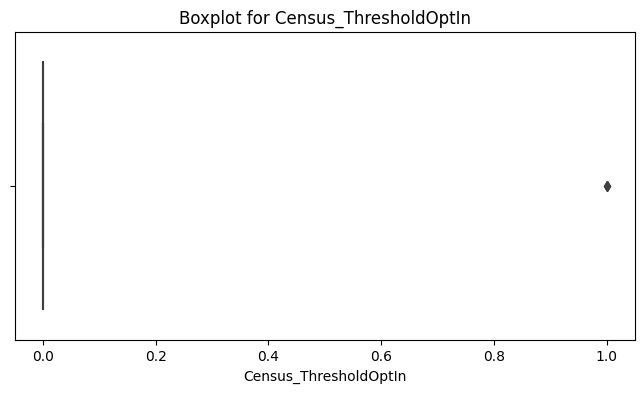

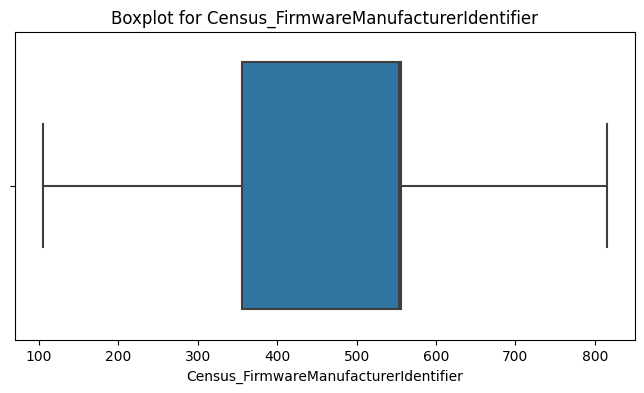

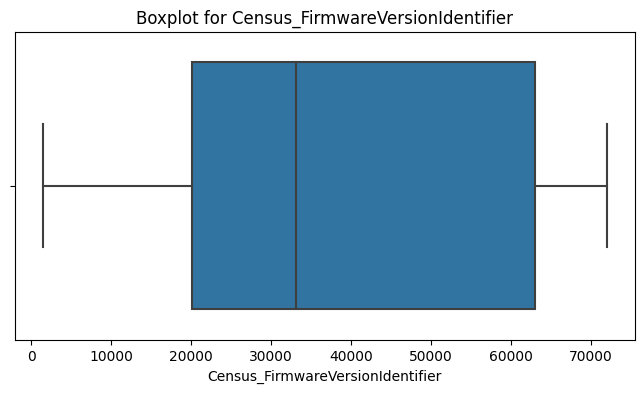

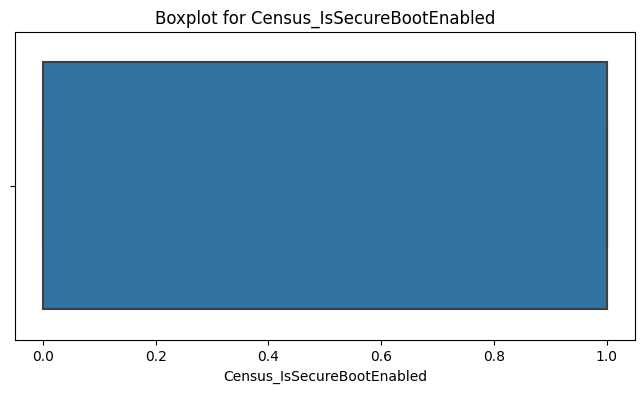

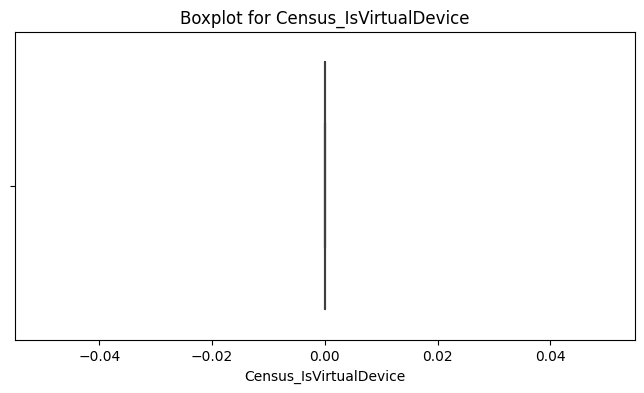

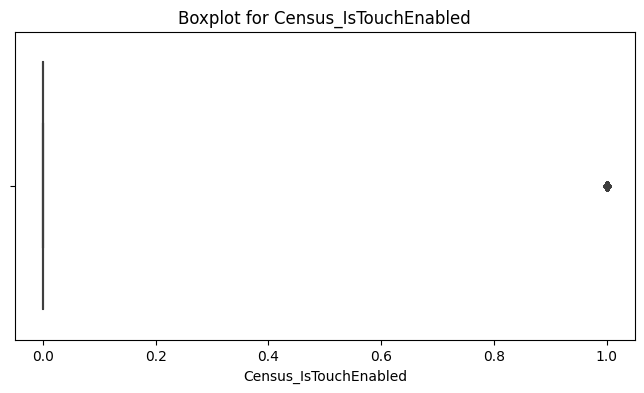

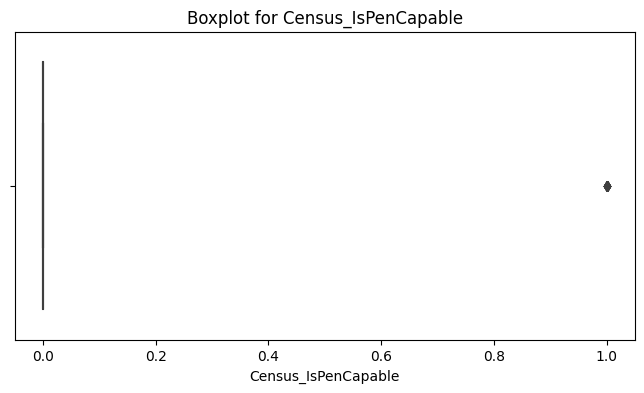

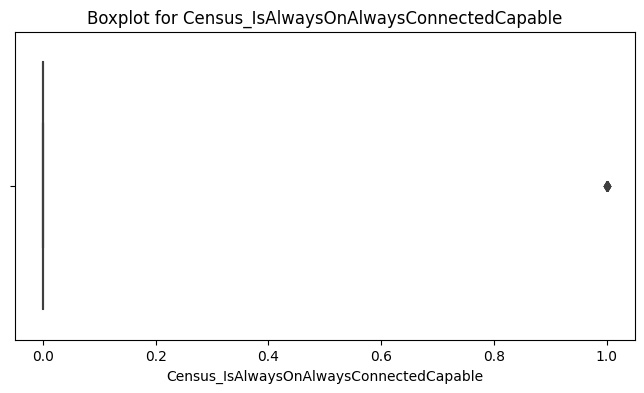

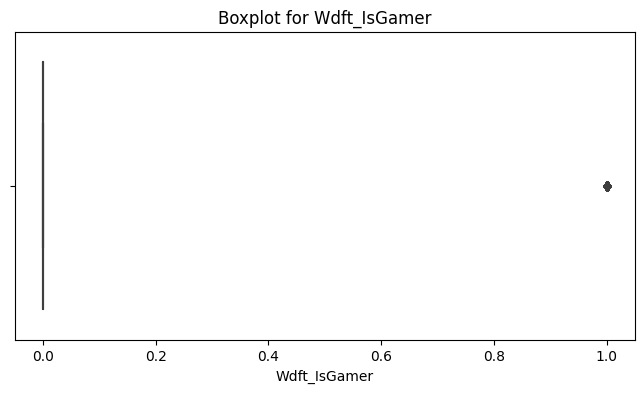

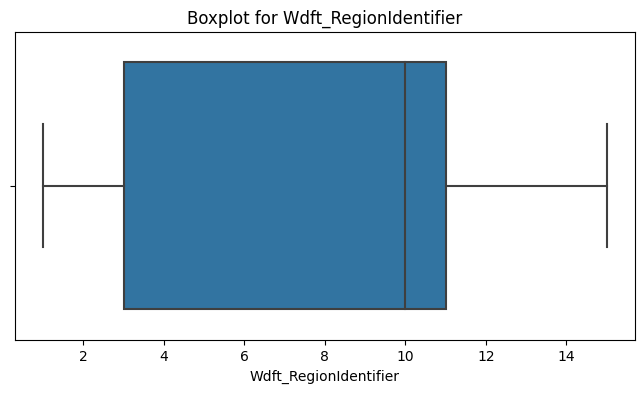

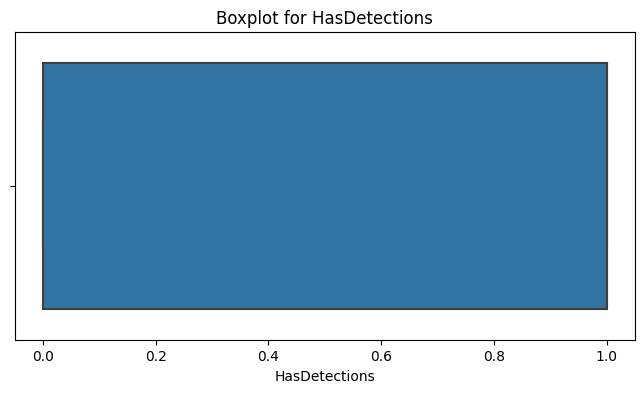

In [ ]:
outlier_percentage = {}  # To store the percentage of outliers for each column

for col in Mic_data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = Mic_data[col].quantile(0.25)
    Q3 = Mic_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate the percentage of outliers
    total_points = Mic_data.shape[0]
    outliers = Mic_data[(Mic_data[col] < lower_bound) | (Mic_data[col] > upper_bound)]
    outlier_percentage[col] = (outliers.shape[0] / total_points) * 100

    #Drop rows with outliers
    Mic_data = Mic_data[(Mic_data[col] >= lower_bound) & (Mic_data[col] <= upper_bound)]


# Calculate and print the percentage of outliers for each column
for col, percentage in outlier_percentage.items():
    print(f'Percentage of outliers in {col}: {percentage:.2f}%')

### Encode categorical features

In [ ]:
Mic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8175 entries, 169 to 999848
Data columns (total 77 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   MachineIdentifier                                  8175 non-null   object 
 1   ProductName                                        8175 non-null   object 
 2   EngineVersion                                      8175 non-null   object 
 3   AppVersion                                         8175 non-null   object 
 4   AvSigVersion                                       8175 non-null   object 
 5   IsBeta                                             8175 non-null   int64  
 6   RtpStateBitfield                                   8175 non-null   float64
 7   IsSxsPassiveMode                                   8175 non-null   int64  
 8   AVProductStatesIdentifier                          8175 non-null   float64
 9   AVPr

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Create an instance of LabelEncoder
labelencoder = LabelEncoder()

# List of categorical columns (object type in your case)
categorical_cols = Mic_data.select_dtypes(include=['object']).columns
# Convert all values in categorical columns to string
for column in categorical_cols:
    Mic_data[column] = Mic_data[column].astype(str)

# Now you can apply LabelEncoder
for column in categorical_cols:
    Mic_data[column] = labelencoder.fit_transform(Mic_data[column])

In [ ]:
Mic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8175 entries, 169 to 999848
Data columns (total 77 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   MachineIdentifier                                  8175 non-null   int64  
 1   ProductName                                        8175 non-null   int64  
 2   EngineVersion                                      8175 non-null   int64  
 3   AppVersion                                         8175 non-null   int64  
 4   AvSigVersion                                       8175 non-null   int64  
 5   IsBeta                                             8175 non-null   int64  
 6   RtpStateBitfield                                   8175 non-null   float64
 7   IsSxsPassiveMode                                   8175 non-null   int64  
 8   AVProductStatesIdentifier                          8175 non-null   float64
 9   AVPr

# Modeling phase

### Decision tree model

In [ ]:
X= Mic_data[['Census_PrimaryDiskTotalCapacity','Census_OSBuildRevision','Census_OSBuildNumber','OsBuild','Wdft_IsGamer','Census_IsAlwaysOnAlwaysConnectedCapable'
,'Census_IsTouchEnabled','Census_ThresholdOptIn','Census_FlightRing']]
y = Mic_data["HasDetections"]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier with a random seed for reproducibility
clf = DecisionTreeClassifier(random_state=42)

# Train (fit) the Decision Tree classifier on the training data
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model by comparing predicted labels to actual labels
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy as a percentage
print(f"Accuracy: {accuracy*100:.2f}%")

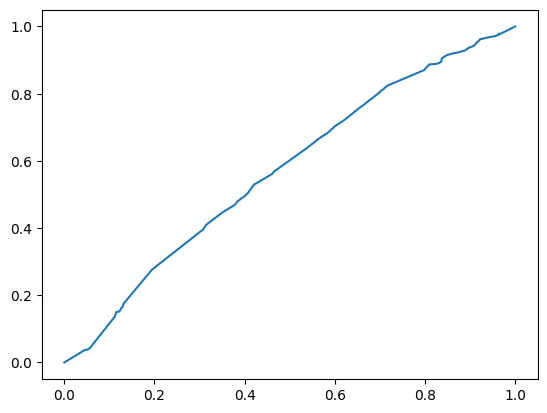

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Predict probabilities
y_probs = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc})')
plt.show()


                ***`Let's try to improve the model performance by changing the model hyperparameters with grid search help`***

In [ ]:
from sklearn.model_selection import KFold

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Define a parameter grid for grid search
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Customize these hyperparameters as needed
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a K-Fold cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring='accuracy', cv=kfold)

# Perform grid search and cross-validation
grid_search.fit(X, y)

# Get the best parameters and estimator
best_params = grid_search.best_params_


# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
# Split your dataset into a training set and a testing set using the best hyperparameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Correct way to create a DecisionTreeClassifier with specific hyperparameters
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy as a percentage
print(f"Accuracy: {accuracy*100:.2f}%")

Tuning the hyperparameters of the Decision Tree model resulted in a marginal accuracy boost from 59.70% to 60.61%, indicating that the optimized configuration allows the model to make slightly more accurate predictions on the test data. While the gain is modest, it reflects an improved ability to discern patterns and classify instances.

# `Part2: unsupervised learning`

### K means clustering

In clustering, there is typically no target variable, unlike in supervised learning where you have a target variable that you want to predict based on the features. Clustering is an unsupervised learning technique where the goal is to group similar data points together based solely on the similarity of their features without the need for a pre-defined target variable.

In [ ]:
# Drop the target variable column
df = Mic_data.drop(columns=['HasDetections'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


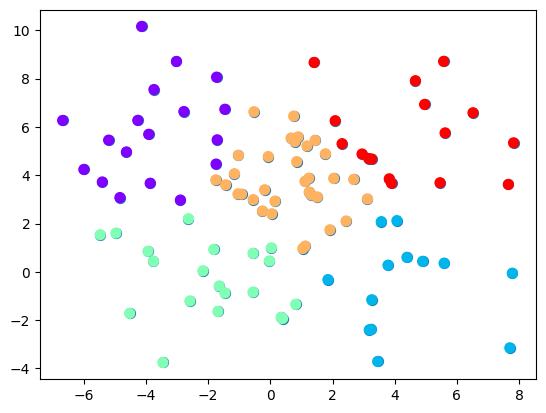

In [ ]:
from sklearn.datasets import make_blobs


x, y = make_blobs(n_samples=100, centers=3, random_state=0, cluster_std=3)

plt.scatter(x[:, 0], x[:, 1], s=50)

model = KMeans(5)
model.fit(x)
y_kmeans = model.predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='rainbow')
plt.show()


    ***`Let's try to improve the model performance by finding the optimal K parameter with grid search help`***

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold

# Create a K-Means clustering model
kmeans = KMeans()

# Define a parameter grid for grid search
param_grid = {
    'n_clusters': [2, 3, 4, 5],  # Customize the number of clusters
    'init': ['k-means++', 'random'],
    'n_init': [10, 30, 50],
    'max_iter': [300, 500, 1000]
}

# Create a K-Fold cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object with 'silhouette' as the scoring metric
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=kfold)

# Perform grid search and cross-validation
grid_search.fit(X)



# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Fit the best estimator on the entire dataset
best_estimator.fit(X)

# Perform cluster assignment (labels_ will contain cluster assignments)
cluster_labels = best_estimator.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Best Parameters: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 5, 'n_init': 10}
Silhouette Score: 0.96


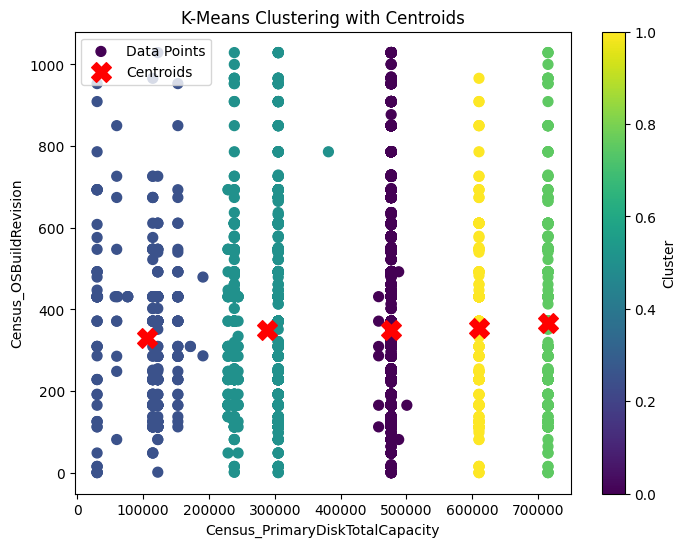

In [ ]:
from sklearn.cluster import KMeans


# Create a K-Means clustering model with the optimal parameters
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300)

# Fit the model to your data
kmeans.fit(X)

# Get the cluster assignments
cluster_labels = kmeans.labels_

# Create a new DataFrame to store the feature data and cluster labels
df_with_clusters = pd.DataFrame(X, columns=['Census_PrimaryDiskTotalCapacity', 'Census_OSBuildRevision'])

# Add the 'Cluster' column to your DataFrame
df_with_clusters['Cluster'] = cluster_labels

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_with_clusters['Census_PrimaryDiskTotalCapacity'], df_with_clusters['Census_OSBuildRevision'], c=df_with_clusters['Cluster'], cmap='viridis', s=50, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('Census_PrimaryDiskTotalCapacity')
plt.ylabel('Census_OSBuildRevision')
plt.title('K-Means Clustering with Centroids')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


The results indicate that `K-Means` clustering with the specified `hyperparameters` has performed exceptionally well on the data.

 It has identified five distinct clusters, and the data points within each cluster are highly similar to each other. This suggests that the clustering has effectively grouped similar data points together while keeping them separate from other groups.

 The 'k-means++' initialization and the number of iterations also contributed to the algorithm's success in finding these well-defined clusters.

Overall, a `silhouette score of 0.96` is a strong indicator of `successful clustering` with clear separation between clusters. It implies that the clustering solution is reliable and can be used for various data analysis tasks, such as segmentation or pattern recognition.